In [306]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import operator

# Questão 1

### Criação da rede

In [158]:
g = nx.Graph()
g.add_edge('1','2')
g.add_edge('1','4')
g.add_edge('2','4')
g.add_edge('2','3')
g.add_edge('4','3')
g.add_edge('3','6')
g.add_edge('3','7')
g.add_edge('6','7')
g.add_edge('3','5')

### Plot:

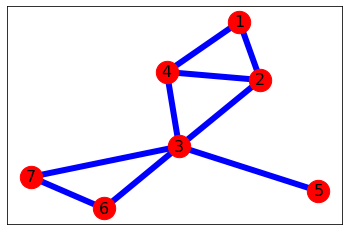

In [159]:
def plot_network(g, ax=-1):
    labels = g.nodes()
    pos = nx.spring_layout(g)
    if(ax == -1):
        nx.draw_networkx(g, with_labels=True, node_color='r', edge_color='b', node_size=500, font_size=16, 
                     pos=pos, width=6)
    else:
        nx.draw_networkx(g, with_labels=True, node_color='r', edge_color='b', node_size=500, font_size=16, 
                     pos=pos, width=6, ax=ax)
plot_network(g)
plt.show(True)

## 1)A) Distribuição de graus dos vértices

### Solução Manual

Matriz de adjacências: 

A=
$\begin{pmatrix}
0 & 1 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

Grau do vértice: $k_i = \sum_{j=1}^n A_{ij}$

Vértice 1: $k_1 = A_{12} + A_{14} = 2$

Vértice 2: $k_2 = A_{21} + A_{23} + A_{24} = 3$

Vértice 3: $k_3 = A_{32} + A_{34} + A_{35} + A_{36} + A_{37} = 5$

Vértice 4: $k_4 = A_{41} + A_{42} + A_{43} = 3$

Vértice 5: $k_5 = A_{53} = 1$

Vértice 6: $k_6 = A_{63} + A_{67} = 2$

Vértice 7: $k_7 = A_{73} + A_{76} = 2$

Distribuição dos graus: $P(k_i=x) = \frac{N_x}{N}\$

$P(k_i=1) = \frac{1}{7}\ \approx\ 0.14$

$P(k_i=2) = \frac{3}{7}\ \approx\ 0.42$

$P(k_i=3) = \frac{2}{7}\ \approx\ 0.28$

$P(k_i=4) = 0$

$P(k_i=5) = \frac{1}{7}\ \approx\ 0.14$

### Solução Computacional

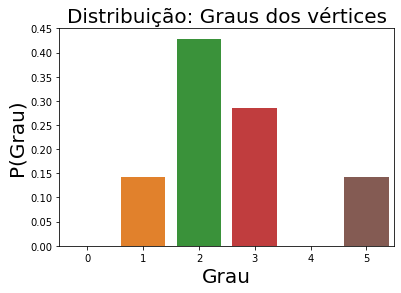

In [160]:
def degree_distribution(g):
    #Builds a list that contains only the degree of each node in the network 
    degrees = np.array(list(dict(g.degree()).values()))    
    
    #Counts how often each degree value appears on the list
    unique, counts = np.unique(degrees, return_counts=True)
    
    #Creates a list containing only zeroes
    #The index represents the degree, and the value it contains
    #represents how often that degree appears in the network
    #This step is necessary in order to set "0" to the frequency of
    #the degree values that are not present in the network
    freq = np.zeros(np.max(unique)+1)
    
    possib = np.arange(np.max(unique+1))
    #Populates the list with the frequency of the degree
    #values actually present in the network
    for value, count in zip(unique, counts):
        freq[value] = count

    #Divides the degree frequency array by the total number of nodes
    #in the network, thus resulting in the probability distribution
    #of a node in the network having a certain degree K
    #Or P(node_degree=k)
    dist = freq/len(g.nodes())
    return possib, freq, dist

possible_degrees, freq, degree_dist = degree_distribution(g)

sns.barplot(x=np.arange(0,len(degree_dist)), y=degree_dist).set_title('Distribuição: Graus dos vértices', fontsize=20)
plt.xlabel('Grau', fontsize=20)
plt.ylabel('P(Grau)', fontsize=20)
plt.show()

## 1) B) Distribuição de coeficientes de clustering

### Solução manual

Clustering local: $ C_i = \frac{2e_i}{k_i(k_i-1)}\ $, sendo $e_i$ o número de arestas entre 
os vizinhos de i, e $k_i$ o número de vértices vizinhos de i.



Clustering médio: $C_L = \frac{ \sum_{i=1}^N Ci}{N}\$

$C_1 = \frac{2x1}{2x(2-1)} = \frac{2}{2} = 1$

$C_2 = \frac{2x2}{3x(3-1)} = \frac{4}{6} \approx 0.66 $

$C_3 = \frac{2x2}{5x(5-1)} = \frac{4}{20} = 0.2$

$C_4 = \frac{2x2}{3x(3-1)} = \frac{4}{6} \approx 0.66$

$C_5 = 0$

$C_6 = \frac{2x1}{2x(2-1)} = \frac{2}{2} = 1$

$C_7 = \frac{2x1}{2x(2-1)} = \frac{2}{2} = 1$

$C_L = \frac{1 + \frac{4}{6} + 0.2 + \frac{4}{6} + 0 + 1 + 1}{7} \approx 0.64 $

### Solução computacional

ccs [1.         0.66666667 0.66666667 0.2        1.         1.
 0.        ]
Valores unicos de CC [0.         0.2        0.66666667 1.        ] 
	Distribuicao [0.14285714 0.14285714 0.28571429 0.42857143]


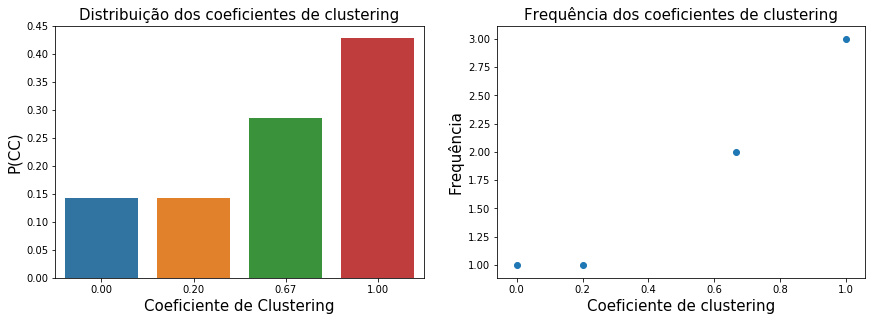

In [161]:
avg_clustering = nx.average_clustering(g)
#print('Average clustering:', avg_clustering)

def cc_distribution(g):
    ccs = []
    for node in g.nodes():
        ccs.append(nx.clustering(g, node))
    ccs = np.array(ccs)
    #print('clustering de cada nó', local)
    unique, freq = np.unique(ccs, return_counts=True)
    dist = freq/sum(freq)
    return ccs, freq, dist

ccs, ccs_freq, ccs_dist = cc_distribution(g)
print('ccs', ccs)
print('Valores unicos de CC', np.unique(ccs), '\n\tDistribuicao', ccs_dist)

fig, axis = plt.subplots(ncols=2)
plt.subplots_adjust(top=1,right=2)

xticklabels = ['{:.2f}'.format(float(x)) for x in np.unique(ccs)]
#Left plot formatting
graph = sns.barplot(x=np.unique(ccs), y=ccs_dist, ax=axis[0])
graph.set_title('Distribuição dos coeficientes de clustering', fontsize=15)
graph.set_ylabel('P(CC)', fontsize=15)
graph.set_xlabel('Coeficiente de Clustering', fontsize=15)
graph.set_xticklabels(xticklabels)

#Right plot formatting
#axis[1].set(xscale='log', yscale='log')
'''graph = sns.scatterplot(x=(ccs), ax=axis[1])
graph.set_title('Frequência dos coeficientes de clustering', fontsize=15)
graph.set_ylabel('Frequência', fontsize=15)
graph.set_xlabel('Coeficiente de clustering', fontsize=15)
graph.set_xticklabels(xticklabels)'''
axis[1].scatter(x=np.unique(ccs), y=ccs_freq)
axis[1].set_title('Frequência dos coeficientes de clustering', fontsize=15)
axis[1].set_ylabel('Frequência', fontsize=15)
axis[1].set_xlabel('Coeficiente de clustering', fontsize=15)

plt.show()

## 1) C) Transitividade

### Solução manual

In [3]:
%%html
<style>
    table {
        display:inline-block;
    }
</style>

|Vértice|Grau|Triplas|
|--|--|--|
|1|2|1|
|2|3|3|
|3|5|10|
|4|3|3|
|5|1|0|
|6|2|1|
|7|2|1|

Total de triângulos: 3

Total de triplas: 19

Transitividade = $ \frac{3 \times \text{Número de triângulos}}{\text{Número de triplas conectadas}}$ = $= \frac{3\times3}{19} \approx 0.47$


### Solução computacional

In [162]:
transitivity = nx.transitivity(g)
print('Transitividade:', transitivity)

Transitividade: 0.47368421052631576


## 1) D) Matriz de distâncias

### Solução manual

Matriz original A=
$\begin{pmatrix}
0 & 1 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

Matriz de distâncias D =
$\begin{pmatrix}
0 & 1 & 2 & 1 & 3 & 3 & 3\\
1 & 0 & 1 & 1 & 2 & 2 & 2\\
2 & 1 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 0 & 2 & 2 & 2\\
3 & 2 & 1 & 2 & 0 & 2 & 2\\
3 & 2 & 1 & 2 & 2 & 0 & 1\\
3 & 2 & 1 & 2 & 2 & 1 & 0\\
\end{pmatrix}$

### Solução computacional

Matriz de distâncias [[0. 1. 2. 1. 3. 3. 3.]
 [1. 0. 1. 1. 2. 2. 2.]
 [2. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 2. 2. 2.]
 [3. 2. 1. 2. 0. 2. 2.]
 [3. 2. 1. 2. 2. 0. 1.]
 [3. 2. 1. 2. 2. 1. 0.]]
Valores únicos, contagens (array([0., 1., 2., 3.]), array([ 7, 18, 18,  6]))
Probabilidades [0.14285714 0.36734694 0.36734694 0.12244898]


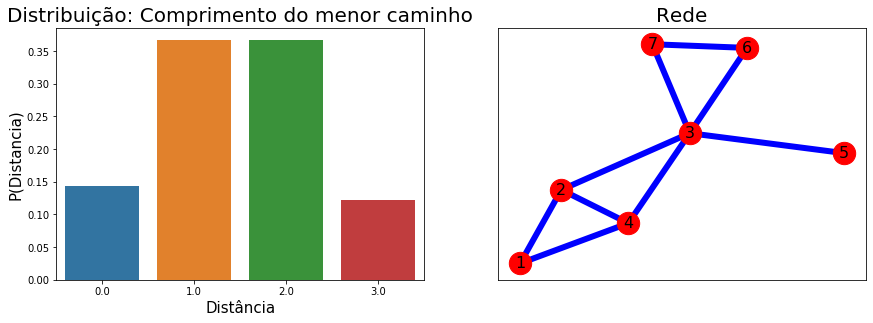

In [163]:
def dist_matrix(g):
    nodes = list(g.nodes())
    nodes.sort()
    node_num = len(nodes)
    
    dist_mat = np.zeros((node_num, node_num))
    for i in np.arange(node_num):
        for j in np.arange(i+1, node_num):
            #print('i=', i, 'nodes[i]=', nodes[i], 'j=', j, 'nodes[j]=', nodes[j])
            if(i != j):
                dist = len(nx.shortest_path(g, nodes[i], nodes[j]))-1
                dist_mat[i][j] = dist
                dist_mat[j][i] = dist
    return dist_mat

dist_mat = dist_matrix(g)
print('Matriz de distâncias', dist_mat)
print('Valores únicos, contagens', np.unique(dist_mat, return_counts=True))
print('Probabilidades', np.unique(dist_mat, return_counts=True)[1]/dist_mat.flatten().shape[0])

path_sizes, path_counts = np.unique(dist_mat, return_counts=True)
path_probs = path_counts/np.sum(dist_mat.flatten().shape[0])

fig, axis = plt.subplots(ncols=2)
plt.subplots_adjust(top=1,right=2)


axis[0].set_title('Distribuição: Comprimento do menor caminho', fontsize=20)
sns.barplot(x=path_sizes, y=path_probs, ax=axis[0])
axis[0].set_ylabel('P(Distancia)', fontsize=15)
axis[0].set_xlabel('Distância', fontsize=15)

axis[1].set_title('Rede', fontsize=20)
plot_network(g, ax=axis[1])

plt.show(True)

### 1) E) Entropia da distribuição de graus

### Solução manual

A entropia de uma distribuição de probabilidade é definida como $ H = -\sum_{k=0}^\infty P(k)logP(k) $.

A distribuição de graus calculada anteriormente é:

$P(k_i=1) = \frac{1}{7}\ \approx\ 0.14$

$P(k_i=2) = \frac{3}{7}\ \approx\ 0.42$

$P(k_i=3) = \frac{2}{7}\ \approx\ 0.28$

$P(k_i=4) = 0$

$P(k_i=5) = \frac{1}{7}\ \approx\ 0.14$

A entropia é, portanto, $ H = -(0.14 \times log(0.14) + 0.42 \times log(0.42) + 0.28 \times log(0.28) + 0 + 0.14\times log(0.14)) \approx 1.83 $

### Solução computacional

In [164]:
def shannon_entropy(g):
    _, freq, dist = degree_distribution(g)
    entropy = 0
    for prob in dist:
        if(prob != 0.):
            entropy += -prob*math.log(prob, 2)
    
    return entropy

print('Entropia de Shannon:', shannon_entropy(g))

Entropia de Shannon: 1.8423709931771088


### 1) F) Segundo momento da distribuição de graus

### Solução manual

Segundo momento amostral: $ M_y(t) = k^t*P(y=k) $

A distribuição de graus calculada anteriormente é:

$P(k_i=1) = \frac{1}{7}\ \approx\ 0.14$

$P(k_i=2) = \frac{3}{7}\ \approx\ 0.42$

$P(k_i=3) = \frac{2}{7}\ \approx\ 0.28$

$P(k_i=4) = 0$

$P(k_i=5) = \frac{1}{7}\ \approx\ 0.14$

Desta maneira, o segundo momento é dado por:

$ M_y(2) = 1^2*0.14 + 2^2*0.42 + 3^2*0.28 + 0 + 5^2*0.14 \approx 7.84$

### Solução computacional

In [165]:
def compute_moment(g, m):
    deg, _, dist = degree_distribution(g)
    moment = np.sum((deg**m)*dist)
    return moment

print('Segundo momento:', compute_moment(g,2))

Segundo momento: 7.999999999999999


## Questão 2

### Carregando um dígrafo ponderado com peso

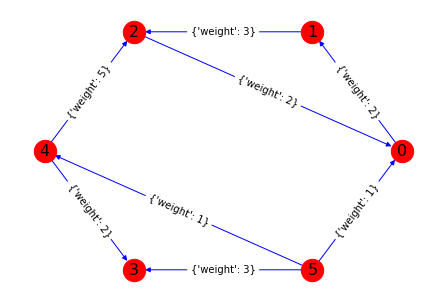

In [166]:
g2 = nx.DiGraph([
    (0,1,{'weight': 2}),
    (1,2,{'weight': 3}),
    (2,0,{'weight': 2}),
    (4,3,{'weight': 2}),
    (4,2,{'weight': 5}),
    (5,0,{'weight': 1}),
    (5,3,{'weight': 3}),
    (5,4,{'weight': 1})])

pos = nx.circular_layout(g2)
nx.draw(g2, with_labels = True, node_color='red', edge_color='blue', node_size=500, font_size=16, pos = pos)
nx.draw_networkx_edge_labels(g2, pos)
plt.show(True)

### Conversão para grafo não-direcionado sem peso

original g2 [[0. 2. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 3. 0.]]
new g2 [[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


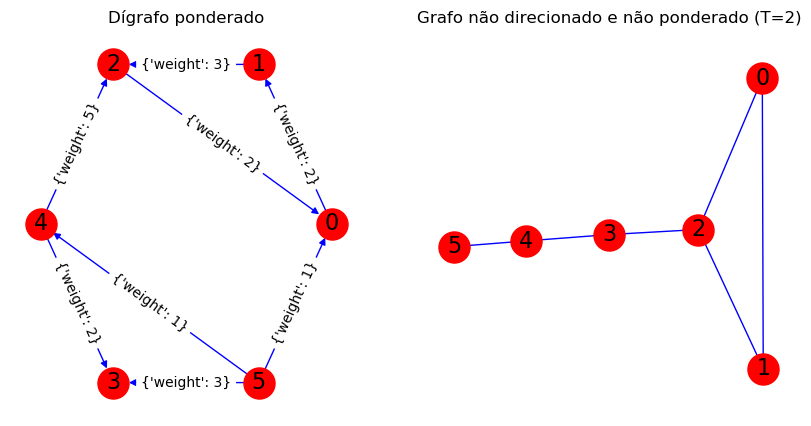

In [169]:
#Converts g2 into a numpy matrix
g2m = nx.to_numpy_matrix(g2)
print('original g2', g2m)
#Makes directed edges undirected
undir_g2m = g2m + g2m.T
new_g2m = np.zeros(g2m.shape)

#Applies a thresholding function to the undirected graph 
new_g2m[undir_g2m >= 2] = 1
new_g2 = nx.from_numpy_matrix(new_g2m)

print('new g2', new_g2m)

plt.style.use('default')
fig, axis = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((10,5))

axis[0].set_title('Dígrafo ponderado')
pos = nx.circular_layout(g2)
nx.draw(g2, with_labels = True, node_color='red', edge_color='blue', node_size=500, font_size=16, pos = pos, ax=axis[0])
nx.draw_networkx_edge_labels(g2, pos, ax=axis[0])

axis[1].set_title('Grafo não direcionado e não ponderado (T=2)')
pos = nx.spring_layout(new_g2)
nx.draw(new_g2, with_labels=True, node_color='red', 
        edge_color='blue', node_size=500, font_size=16, pos = pos, ax=axis[1])
plt.show()

## Los Miserables (com peso)

('Napoleon', 'Myriel')
(1, 8)


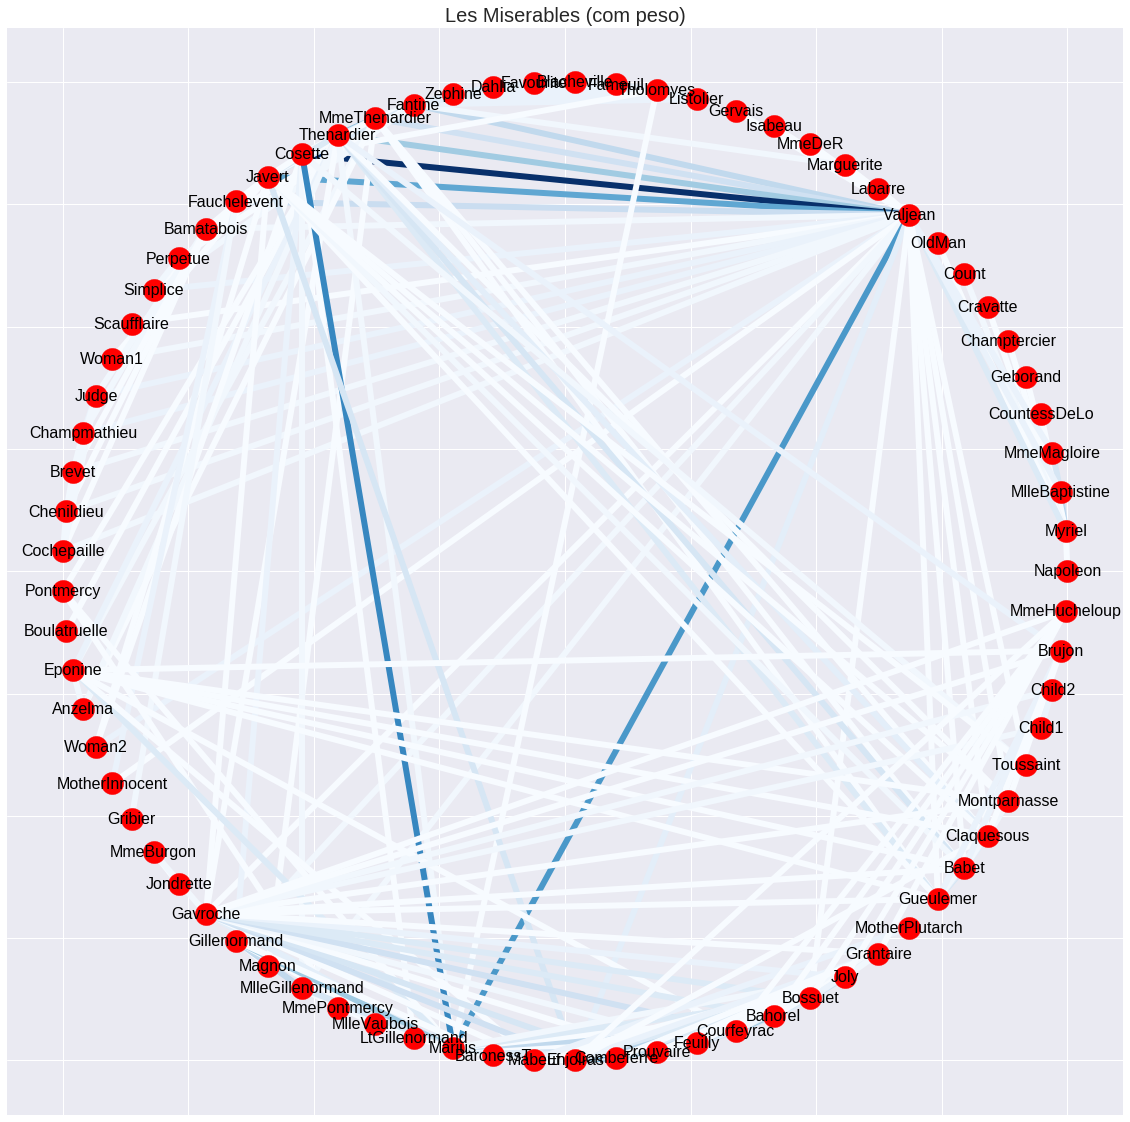

In [415]:
lesmis_weighted = nx.les_miserables_graph()

#g3 = nx.read_weighted_edgelist('datasets/les_miserables', comments='%')
plt.figure(figsize=(20,20))
plt.style.use('seaborn')
pos = nx.circular_layout(lesmis_weighted)

edges, weights = zip(*nx.get_edge_attributes(lesmis_weighted, 'weight').items())
print(edges[0])
print(weights[0:2])

nx.draw_networkx(lesmis_weighted, pos=pos, with_labels=True, node_color='red', edgelist=edges, edge_color=weights, 
                 edge_cmap = plt.cm.Blues, node_size=500, font_size=16, font_color='black', width=6)
#nx.draw_networkx_edge_labels(g3, pos)
plt.title('Les Miserables (com peso)', fontsize=20)
plt.show()

### Los Miserables (sem peso)

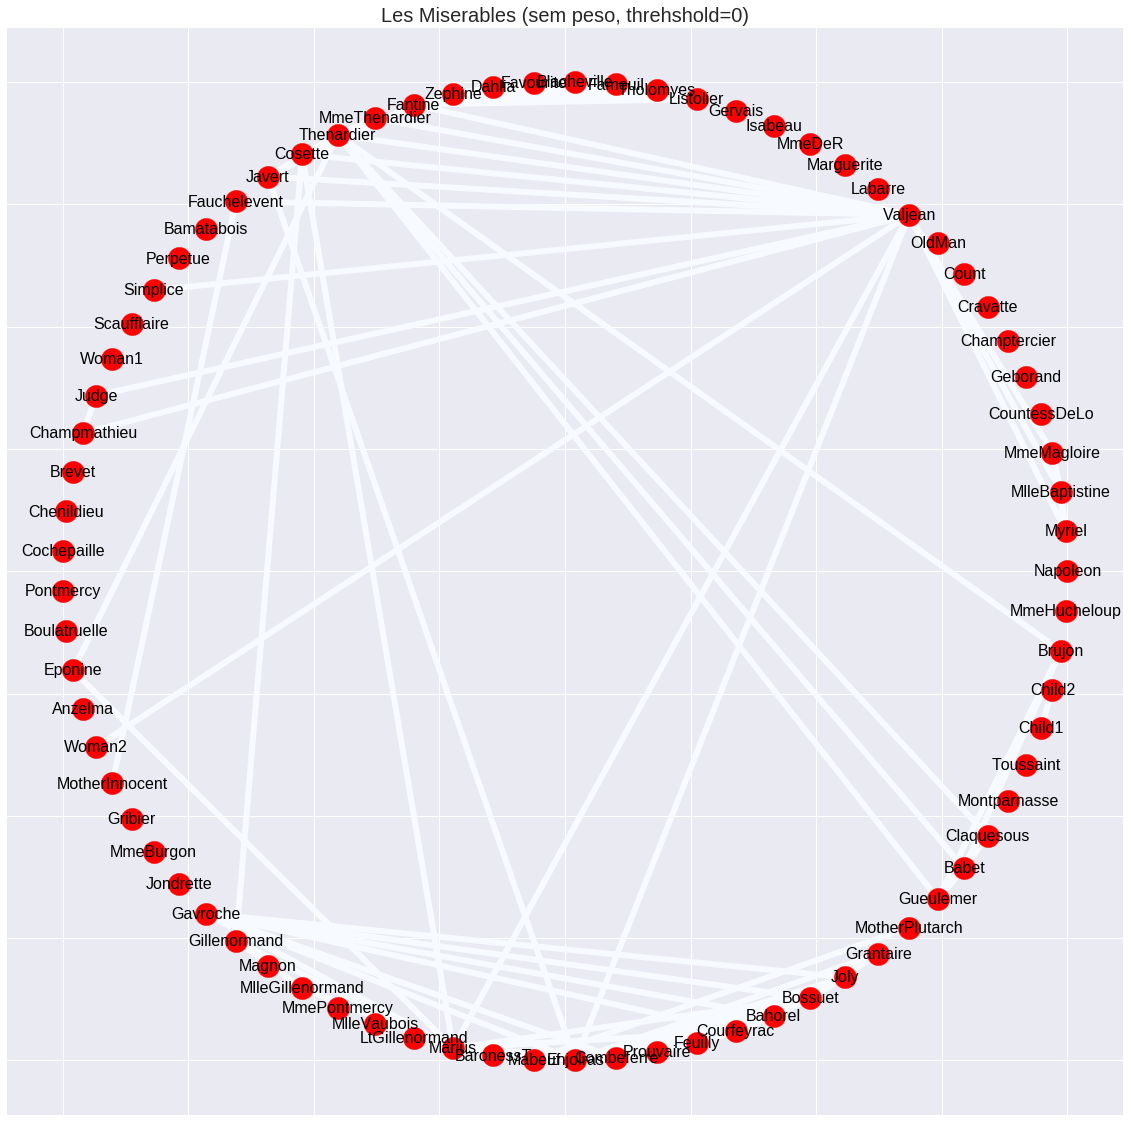

In [517]:
def threshold_graph(g, min_weight):
    undir_g = nx.Graph()
    undir_g.add_nodes_from(g)
    for (u, v, w) in g.edges(data=True):
        if(w['weight'] > min_weight):
            undir_g.add_edge(u, v, weight=1)

    return undir_g

threshold = 0
lesmis_unweighted = threshold_graph(lesmis_weighted, threshold)
edges, weights = zip(*nx.get_edge_attributes(undir_g3, 'weight').items())

pos = nx.circular_layout(lesmis_unweighted)
plt.figure(figsize=(20,20))
nx.draw_networkx(lesmis_unweighted, with_labels=True, node_color='red', edgelist=edges, edge_color=weights, 
                 edge_cmap= plt.cm.Blues, node_size=500, font_size=16, font_color='black', pos=pos, width=6)
plt.title('Les Miserables (sem peso, threhshold={})'.format(threshold), fontsize=20)
plt.show()

### Florida Ecosystem Wet (com peso)

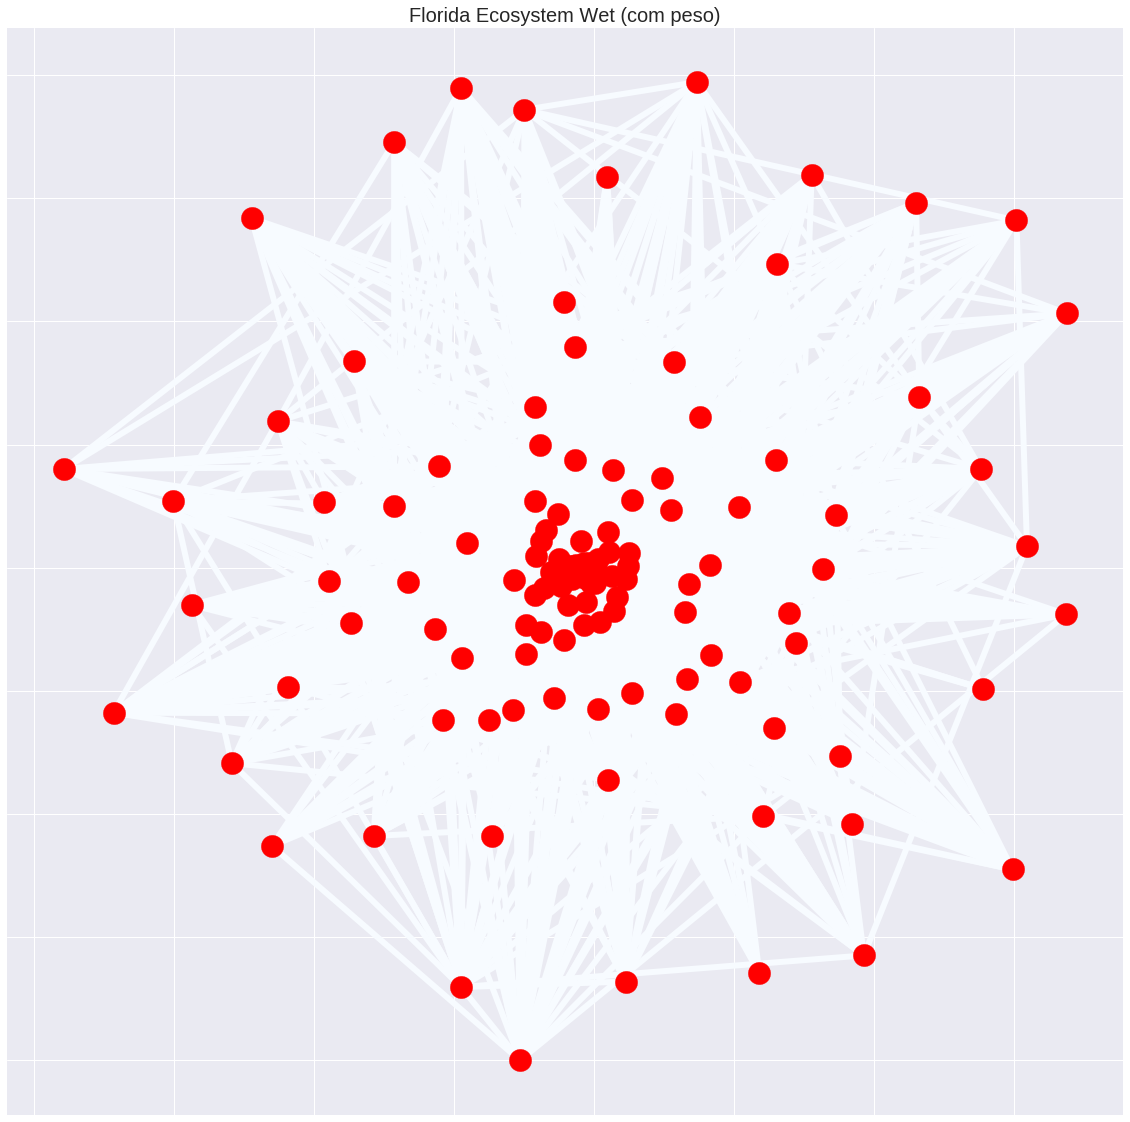

In [434]:
florida_weighted = nx.read_weighted_edgelist('datasets/florida', comments='%')


edges, weights = zip(*nx.get_edge_attributes(florida_weighted, 'weight').items())

plt.style.use('seaborn')
plt.figure(figsize=(20,20))
pos = nx.spring_layout(florida_weighted)
nx.draw_networkx(florida_weighted, with_labels=False, node_color='red', edgelist=edges, edge_color=w_norm, 
                 edge_cmap= plt.cm.Blues, node_size=500, font_size=16, font_color='black', pos=pos, width=6)
#nx.draw_networkx_edge_labels(g4, pos)

plt.title('Florida Ecosystem Wet (com peso)', fontsize=20)
plt.show()

### Florida Ecosystem Wet (sem peso)

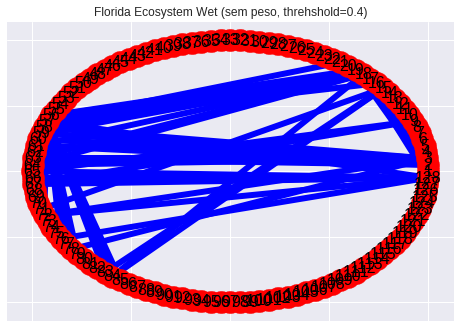

In [419]:
threshold = 0.4
florida_unweighted = threshold_graph(florida_weighted, threshold)

pos = nx.circular_layout(florida_unweighted)
nx.draw_networkx(florida_unweighted, with_labels=True, node_color='red', edge_color='blue', node_size=500, font_size=16, 
             font_color='black', pos=pos, width=6)
#nx.draw_networkx_edge_labels(undir_g4, pos)
plt.title('Florida Ecosystem Wet (sem peso, threhshold={})'.format(threshold))
plt.show()

## Questão 3

### Implementação da rotina de random walk e teste em uma rede simples

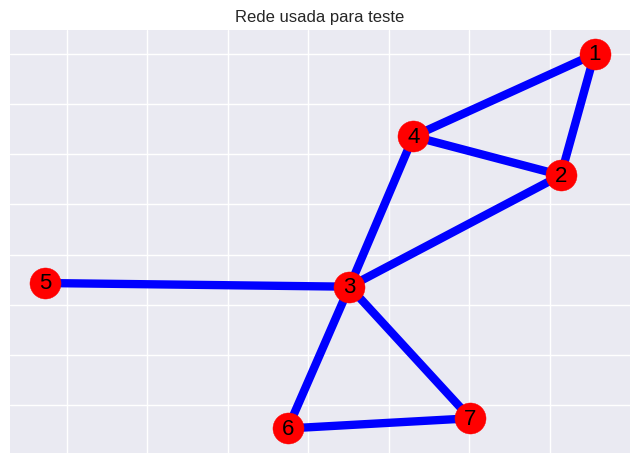

[[0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0.]]


In [286]:
g = nx.Graph()
g.add_edge('1','2')
g.add_edge('1','4')
g.add_edge('2','4')
g.add_edge('2','3')
g.add_edge('4','3')
g.add_edge('3','6')
g.add_edge('3','7')
g.add_edge('6','7')
g.add_edge('3','5')
plot_network(g)
plt.title('Rede usada para teste')
plt.show()

print(nx.to_numpy_array(g, nodelist=sorted(g.nodes())))


[0 1 2 3 4 5 6]
[1169 1757 2740 1704  538 1037 1055]


Text(0.5, 1.0, 'Histograma: Teste de visitas do random walk')

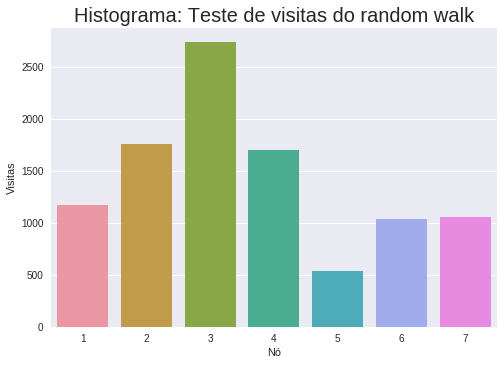

In [420]:
def random_walk(g, steps):
    g_mat = nx.to_numpy_array(g, nodelist=sorted(g.nodes()))
    #print(g_mat)
    '''edge_probs = (1/np.sum(g_mat, 0))
    prob_mat = np.zeros(g_mat.shape)
    for i in range(g_mat.shape[0]):
        prob_mat[i,:] = g_mat[i,:]*edge_probs[i]'''
        
    #print(np.random.choice(np.arange(g_mat.shape[1])[g_mat[6,:] == 1], 10))
    
    path = np.zeros((steps,), dtype=np.int64)
    step = 0
    for i in range(steps-1):
        path[i] = step
        step = np.random.choice(np.arange(g_mat.shape[1])[g_mat[step, :] > 0.0])
    path[i+1] = step
    return path
        
path = random_walk(g, 10000)
vertices, counts = np.unique(path, return_counts=True)
dist = counts/np.sum(counts)
print(vertices)
print(counts)
plt.xlabel('Nó')
plt.ylabel('Visitas')
sns.barplot(x=vertices+1, y=counts).set_title('Histograma: Teste de visitas do random walk', fontsize=20)


### Observa-se que nós de grau maior foram visitados com maior frequência.

### Faz-se o experimento agora aplicando a rotina de random walk à rede de Les Miserables

In [421]:
#A função que transforma a rede em um array do numpy não garante a ordem dos vértices
#Foi implementada esta função, que garante que é usada a mesma ordem do random walk
def compute_degrees(g):
    g_mat = nx.to_numpy_array(g, nodelist=sorted(g.nodes()))
    degs = np.sum(g_mat, 1, dtype=np.int64)
    return degs
sample_deg = compute_degree(g)
print(sample_deg)
print(np.unique(sample_deg, return_counts=True))

[2 3 5 3 1 2 2]
(array([1, 2, 3, 5]), array([1, 3, 2, 1]))


Text(0.5, 1.0, 'Les Miserables\nNúmero de visitas x grau')

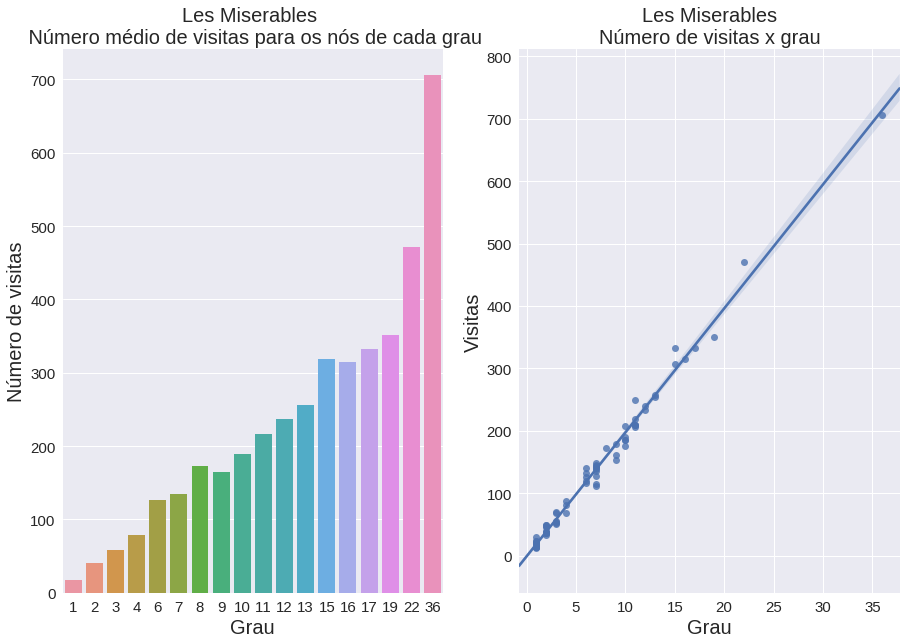

In [446]:
#Computa numero total e medio de visitas por grau, e cria uma matriz
#de 2 colunas, com cada observacao das variaveis grau e numero de visitas
def visits_per_degree(g, path):
    #Conta o numero de visitas pra cada nó
    nodes, node_visit_count = np.unique(path, return_counts=True)
    
    #Computa o grau dos vértices
    node_degrees = compute_degrees(g5)
    
    #Conta o número de vértices por grau
    unique_degrees, node_degree_count = np.unique(node_degrees, return_counts=True)    
    
    nodes_per_degree = dict(zip(unique_degrees, node_degree_count))

    #Armazena quantas visitas houve para todos os nós de determinado grau
    total_visits_per_degree = dict()
    
    visit_degrees = []
    for node, visit_count, degree in zip(nodes, node_visit_count, node_degrees):        
        if(degree in total_visits_per_degree.keys()):
            total_visits_per_degree[degree] += visit_count
        else:
            total_visits_per_degree[degree] = visit_count

        visit_degrees.append([degree, visit_count])
    
    #Matriz que contem cada observação dos pares de variáveis grau x visitas no caminho
    #feito pelo random walk
    visit_degrees_matrix = np.array(visit_degrees)
    
    #Computa numero medio de visitas por grau
    average_visits_per_degree = dict()
    for degree in nodes_per_degree.keys():
        average_visits_per_degree[degree] = total_visits_per_degree[degree]/nodes_per_degree[degree]        

    sorted_avg = sorted(average_visits_per_degree.items(), key=operator.itemgetter(1))
    degrees, avg_visits = (zip(*sorted_avg))
    average_visits_per_degree = dict(zip(degrees, avg_visits))

    return total_visits_per_degree, average_visits_per_degree, visit_degrees_matrix

#tira os pesos da rede do Les Miserables
lesmis_unweighted = threshold_graph(lesmis_weighted, 0)
#Faz o random walk. Retorna o caminho realizado pelo algoritmo
path = random_walk(lemis_unweighted, 10000)

total_visits_per_degree, avg_visits_per_degree, visit_degrees = visits_per_degree(lemis_unweighted, path)

fig, axis = plt.subplots(1,2, figsize=(15,10))

axis[0].set_xlabel('Grau', fontsize=20)
axis[0].set_ylabel('Número de visitas', fontsize=20)
axis[0].tick_params(labelsize=15)
sns.barplot(x=list(avg_visits_per_degree.keys()), 
            y=list(avg_visits_per_degree.values()),
           ax=axis[0]).set_title('Les Miserables \n Número médio de visitas para os nós de cada grau', 
                                                             fontsize=20)

axis[1].set_xlabel('Grau', fontsize=20)
axis[1].set_ylabel('Visitas', fontsize=20)
axis[1].tick_params(labelsize=15)
sns.regplot(x=visit_degrees[:,0],y=visit_degrees[:,1], ax=axis[1]).set_title('Les Miserables\nNúmero de visitas x grau', fontsize=20)

### Nota-se que existe uma correlação linear e positiva entre o número de visitas e o grau de um vértice. Repetindo o experimento para a rede florida ecosystem, observa-se:

Text(0.5, 1.0, 'Florida Ecosystem \n Número de visitas x grau')

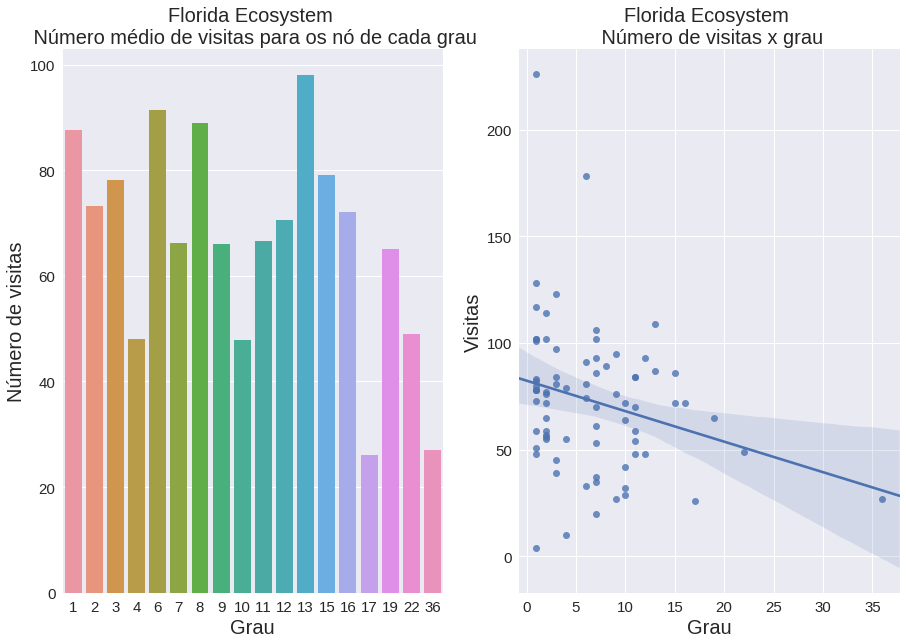

In [447]:
florida_unweighted = threshold_graph(florida_weighted, 0)
path = random_walk(florida_unweighted, 10000)
total, average, visit_degrees = visits_per_degree(florida_unweighted, path)

fig, axis = plt.subplots(1,2, figsize=(15,10))

axis[0].set_xlabel('Grau', fontsize=20)
axis[0].set_ylabel('Número de visitas', fontsize=20)
axis[0].tick_params(labelsize=15)

sns.barplot(x=list(average.keys()), 
            y=list(average.values()),
           ax=axis[0]).set_title('Florida Ecosystem \n Número médio de visitas para os nó de cada grau', 
                                                             fontsize=20)

axis[1].set_xlabel('Grau', fontsize=20)
axis[1].set_ylabel('Visitas', fontsize=20)
axis[1].tick_params(labelsize=15)
sns.regplot(x=visit_degrees[:,0],y=visit_degrees[:,1], 
            ax=axis[1]).set_title('Florida Ecosystem \n Número de visitas x grau', fontsize=20)


### Neste caso, a dispersão dos dados sugere que não há correlação linear entre as variáveis graus e número de visitas, além de que, se houvesse, a direção da reta de regressão indica que seria negativa. 

### É possível que a rede Florida Ecosystem Wet tenha comportamento atípico que esteja influenciando a relação entre grau e número de visitas. Para investigar esta hipótese, iniciamos pela análise da distribuição de graus.

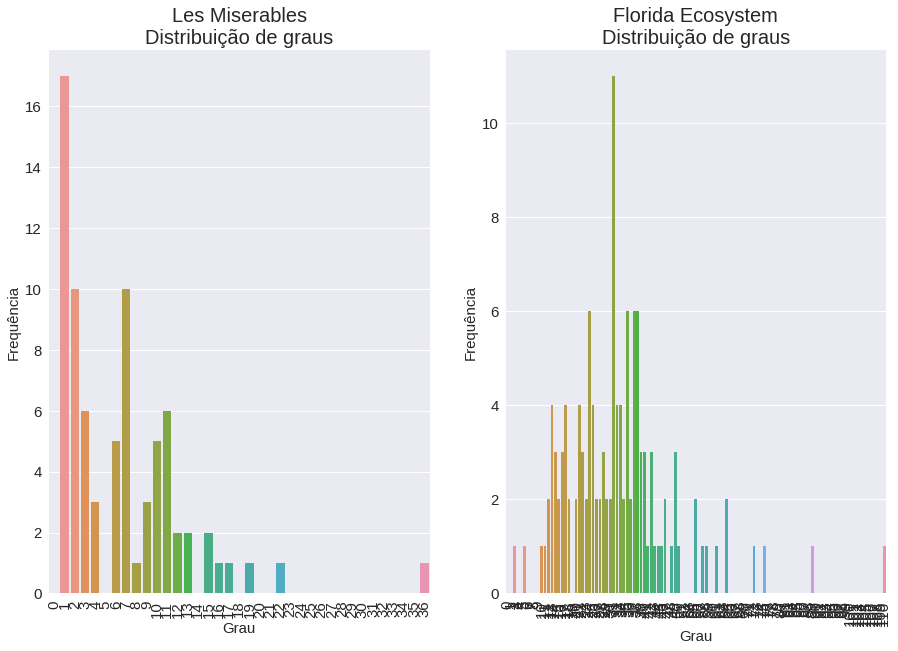

In [480]:
fig, axis = plt.subplots(1, 2, figsize=(15,10))

possib, freq, dist = degree_distribution(lesmis_unweighted)
axis[0].set_xlabel('Grau', fontsize=15)
axis[0].set_ylabel('Frequência', fontsize=15)
axis[0].tick_params(labelsize=15)
g = sns.barplot(x=possib, y=freq, ax=axis[0])
g.set_title('Les Miserables\nDistribuição de graus', fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

possib, freq, dist = degree_distribution(florida_unweighted)
axis[1].set_xlabel('Grau', fontsize=15)
axis[1].set_ylabel('Frequência', fontsize=15)
axis[1].tick_params(labelsize=15)
g2 = sns.barplot(x=possib, y=freq, ax=axis[1])
g2.set_title('Florida Ecosystem\nDistribuição de graus', fontsize=20)
g2.set_xticklabels(g2.get_xticklabels(), rotation=90);

### Nota-se que o grau dos nós rede de Les Miserables, que apresentou correlação linear positiva entre as duas variáveis, segue uma distribuição semelhante à lei de potências. Neste tipo de rede pode-se esperar maior concentração de hubs, o que resulta em uma maior frequência de visitas a nós de grau alto pelo random walk.

### Já a rede Florida Ecosystem não segue a lei de potências. Neste caso há menor incidência de hubs, fazendo com que o random walk não atravesse vértices de grau alto com a mesma frequência que ocorre nas redes que seguem a lei de potências. 

## Questão 4
## Gerando grafo

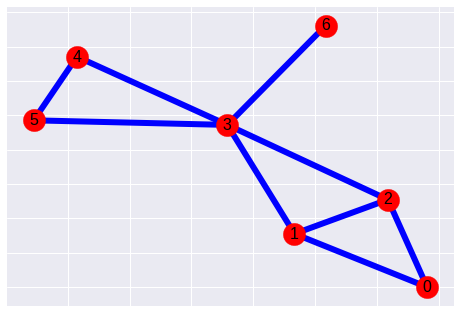

In [534]:
g = nx.Graph()
g.add_edge(0,1)
g.add_edge(0,3)
g.add_edge(1,3)
g.add_edge(1,2)
g.add_edge(3,2)
g.add_edge(2,5)
g.add_edge(2,6)
g.add_edge(5,6)
g.add_edge(2,4)
#g = g.to_undirected()
g = nx.convert_node_labels_to_integers(g, first_label=0)
plot_network(g)
plt.show(True)

A = nx.to_numpy_array(g)
#Calculating ProbMat
edge_probs = (1/np.sum(A, 0))
prob_mat = np.zeros(A.shape)
for i in range(A.shape[0]):
    prob_mat[i,:] = A[i,:]*edge_probs[i]

## Implementação de rotina para potência de matriz

In [522]:
m = []

def matPow(prob_mat,n):
    P_n = prob_mat
    for i in range(1, n):
        P_n = P_n.dot(prob_mat)
    return P_n

for n in [2,5,13,44,70]:
    m.append(matPow(prob_mat,n))
    
#Imprimindo as matrizes
for n in range(0,len(m)):
    print(n)
    print(m[n].round(4))

0
[[0.3333 0.1667 0.1667 0.3333 0.     0.     0.    ]
 [0.1111 0.3444 0.2333 0.1111 0.0667 0.0667 0.0667]
 [0.1111 0.2333 0.3444 0.1111 0.0667 0.0667 0.0667]
 [0.1333 0.0667 0.0667 0.5333 0.1    0.1    0.    ]
 [0.     0.1    0.1    0.25   0.35   0.1    0.1   ]
 [0.     0.1    0.1    0.25   0.1    0.35   0.1   ]
 [0.     0.2    0.2    0.     0.2    0.2    0.2   ]]
1
[[0.116  0.2195 0.2195 0.1938 0.093  0.093  0.0652]
 [0.1463 0.1679 0.172  0.3045 0.0852 0.0852 0.0388]
 [0.1463 0.172  0.1679 0.3045 0.0852 0.0852 0.0388]
 [0.0775 0.1827 0.1827 0.2136 0.1324 0.1324 0.0787]
 [0.093  0.1279 0.1279 0.3309 0.1178 0.149  0.0536]
 [0.093  0.1279 0.1279 0.3309 0.149  0.1178 0.0536]
 [0.1304 0.1163 0.1163 0.3937 0.1072 0.1072 0.0289]]
2
[[0.1111 0.1691 0.1691 0.2734 0.1106 0.1106 0.0563]
 [0.1127 0.1666 0.1666 0.2795 0.11   0.11   0.0547]
 [0.1127 0.1666 0.1666 0.2795 0.11   0.11   0.0547]
 [0.1094 0.1677 0.1677 0.2741 0.1121 0.1121 0.0568]
 [0.1106 0.1649 0.1649 0.2803 0.1119 0.112  0.0554]
 [0.

a) Conforme n aumenta, a matriz de probabilidades, $p_{ij}^n$ tende a ficar com as linhas repetidas, indicando que a probabilidade de atingir um vértice qualquer, independe do vértice inicial.

## 4)B)

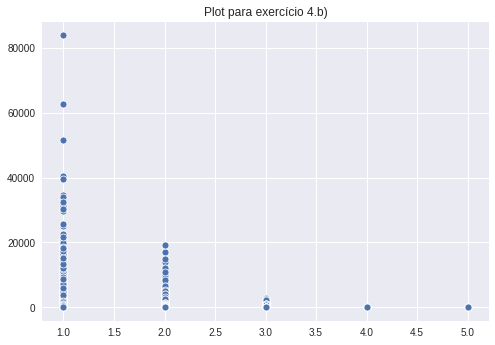

In [533]:
lm = nx.to_undirected(lesmis_weighted)
Gcc=sorted(nx.connected_component_subgraphs(lm), key = len, reverse=True)
lm=Gcc[0]
lm = nx.convert_node_labels_to_integers(lm, first_label=0)
D = dict(nx.all_pairs_shortest_path_length(lm))
A = A = nx.to_numpy_array(lm)
A_3 = matPow(A,3)

distancesX = []
adjacency3Y = []
for u in range(0,A.shape[0]):
    for v in range(u+1, A.shape[1]):
        distancesX.append(D[u][v])
        adjacency3Y.append(A_3[u][v])

sns.scatterplot(x=distancesX,y=adjacency3Y).set_title('Plot para exercício 4.b)');

In [531]:
#returns all matrices powers up to N
def matPowAll(prob_mat,n):
    Pn = []
    P = prob_mat
    for i in range(1, n+1):
        P = P.dot(prob_mat)
        Pn.append(P)
    return Pn

D = dict(nx.all_pairs_shortest_path_length(lm))
A = nx.to_numpy_array(g)
#Calculating ProbMat
edge_probs = (1/np.sum(A, 0))
P = np.zeros(A.shape)
for i in range(A.shape[0]):
    P[i,:] = A[i,:]*edge_probs[i]

nMax=100
Pn = matPowAll(P,nMax)
#flattening matrices
distances = []
for u in range(0,A.shape[0]):
    for v in range(u+1, A.shape[1]):
        distances.append(D[u][v])

## 4)C)

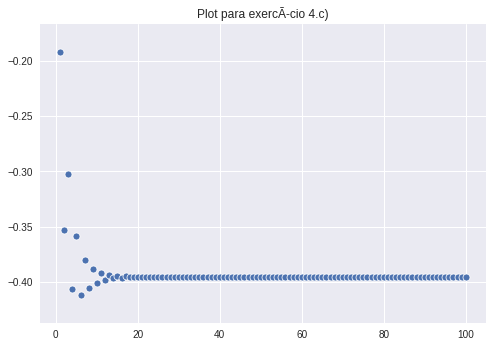

In [532]:
PFlat = []

for n in range(0,len(Pn)): 
    aux = []
    for u in range(0,A.shape[0]):
        for v in range(u+1, A.shape[1]): 
            aux.append(Pn[n][u][v])
    PFlat.append(aux)


#Calculating pearson
import scipy.stats.stats
pearsonY = []
for n in range(0,len(Pn)):
    corr, pvalue = scipy.stats.stats.pearsonr(distances,PFlat[n])
    pearsonY.append(corr)

X = np.arange(1,nMax+1)
sns.scatterplot(x=X,y=pearsonY).set_title('Plot para exercÃ­cio 4.c)');

## Questão 6

## A)Rede E-road

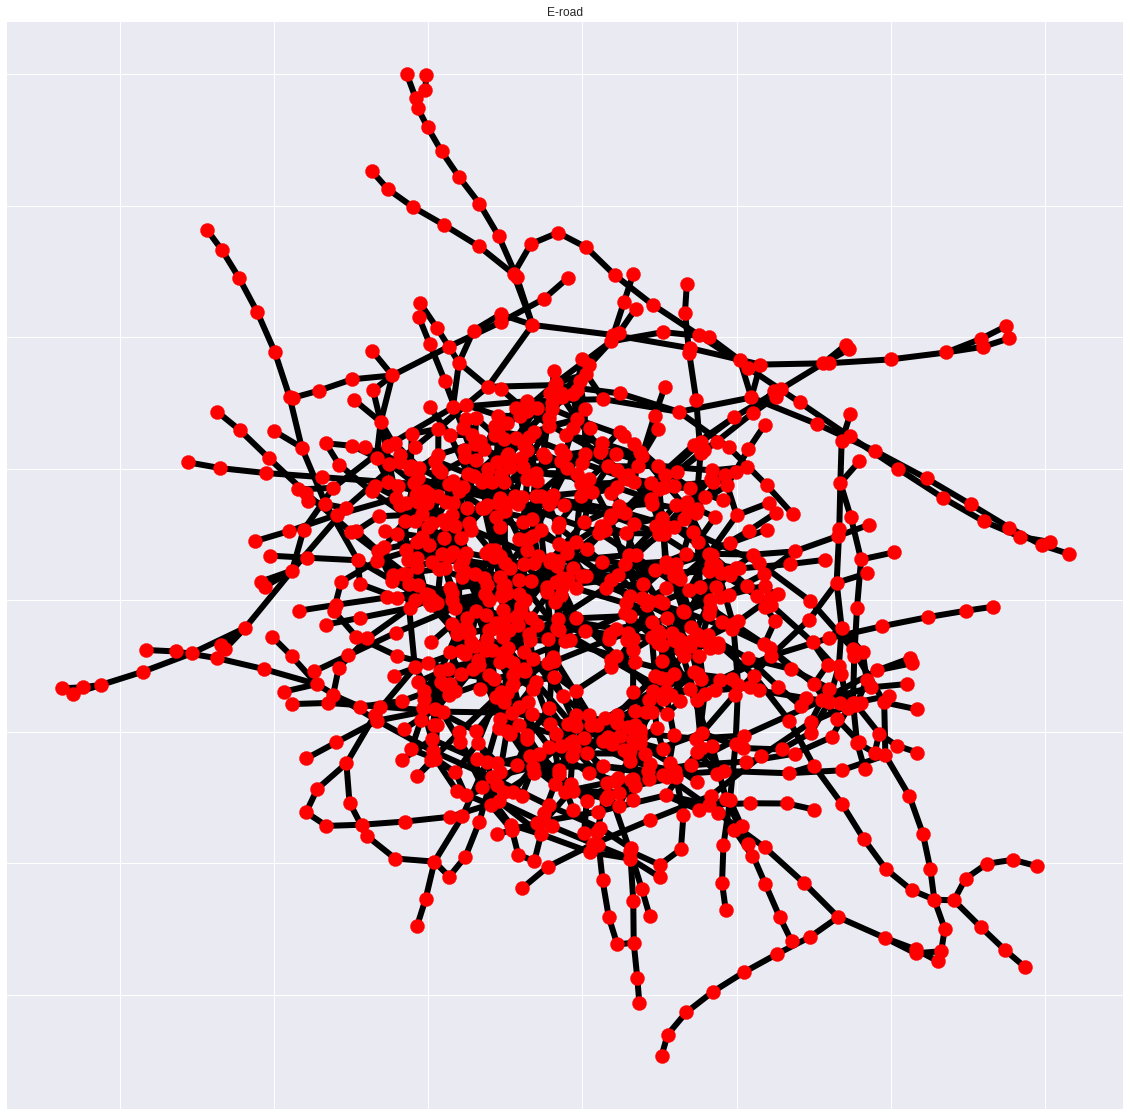

In [511]:
e_road = nx.read_edgelist('datasets/euroroad', comments='%')
e_road = max(nx.connected_component_subgraphs(e_road), key=len)

plt.figure(figsize=(20,20))

pos = nx.spring_layout(e_road)
plt.title('E-road')
nx.draw_networkx(e_road, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)

## 6)B)Rede Dolphins
### A rede Facebook user-user frendships mostrou-se demasiado grande para processar localmente. Portanto, a rede Dolphins será utilizada como substituta na análise.

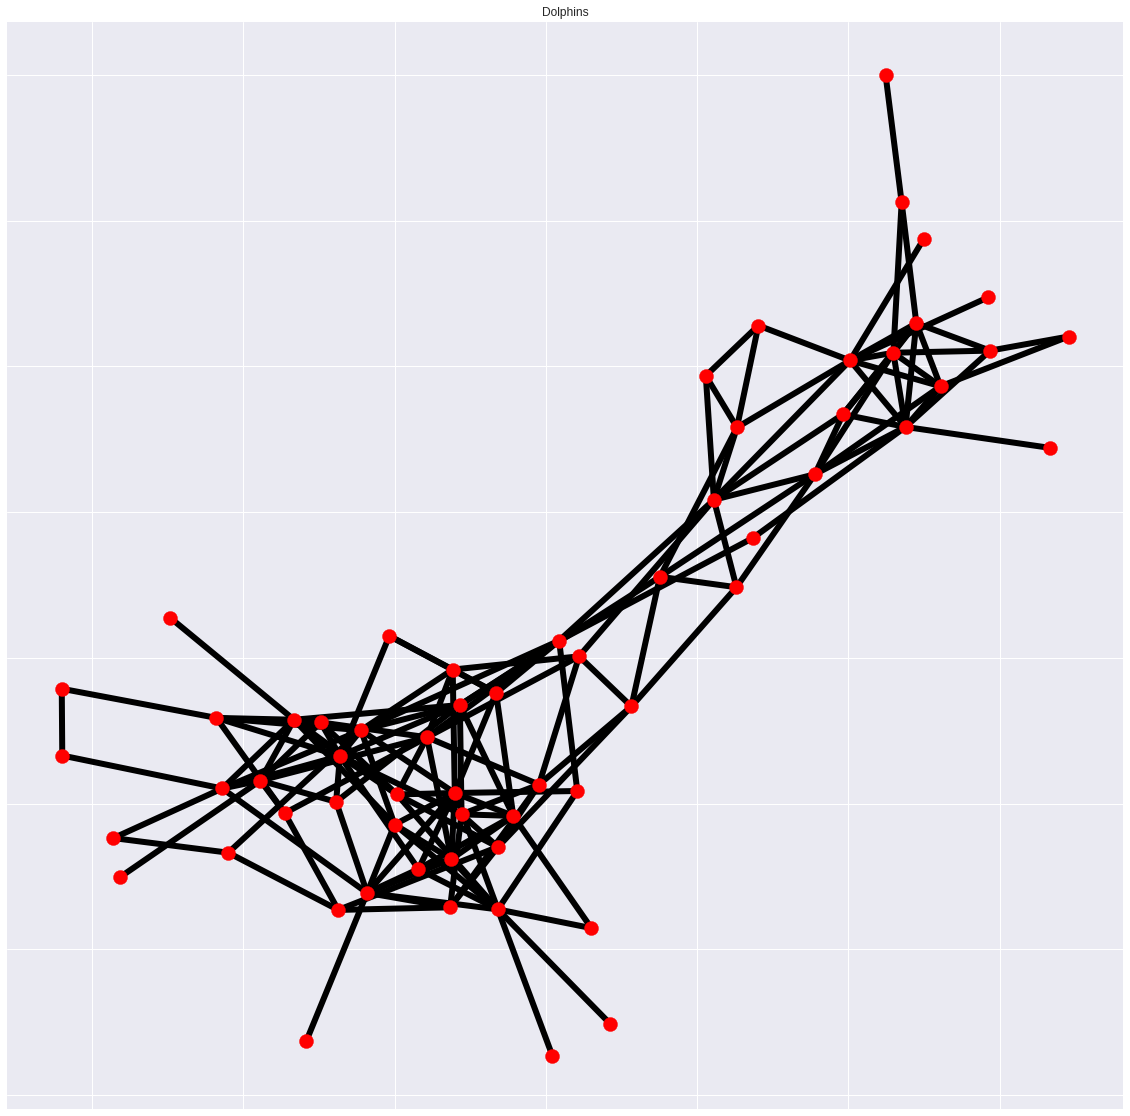

In [516]:
dolphins = nx.read_edgelist('datasets/dolphins', comments='%')
#dolphins = max(nx.connected_component_subgraphs(dolphins), key=len)

plt.figure(figsize=(20,20))

pos = nx.spring_layout(dolphins)
plt.title('Dolphins')
nx.draw_networkx(dolphins, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)

## 6)C)Rede Netscience

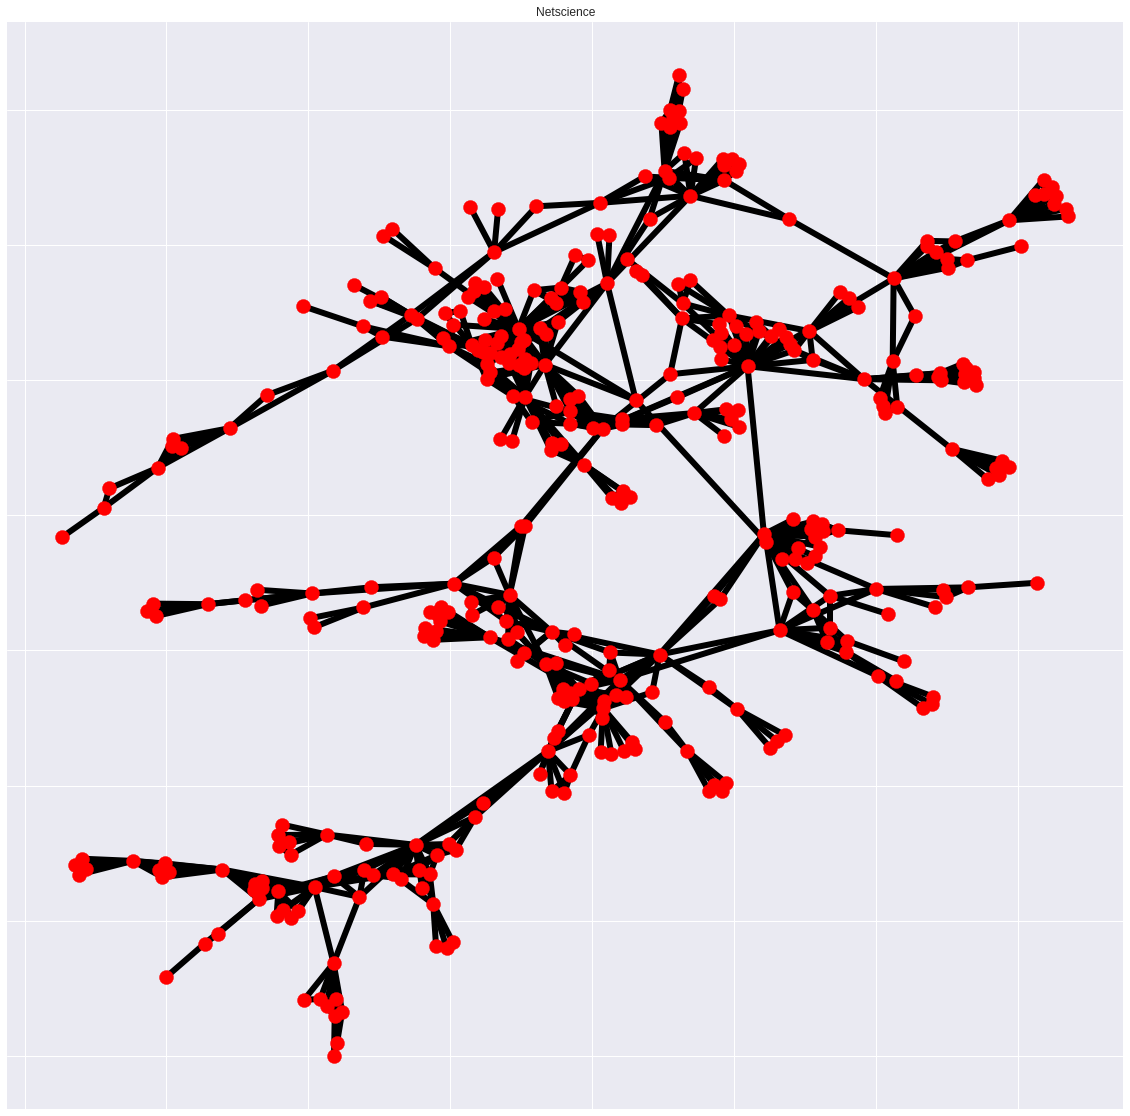

In [512]:
netscience = nx.read_gml('datasets/netscience.gml')
netscience = max(nx.connected_component_subgraphs(netscience), key=len)

plt.figure(figsize=(20,20))

pos = nx.spring_layout(netscience)
plt.title('Netscience')
nx.draw_networkx(netscience, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)


## 6) D) Rede Hamsterster Friendships

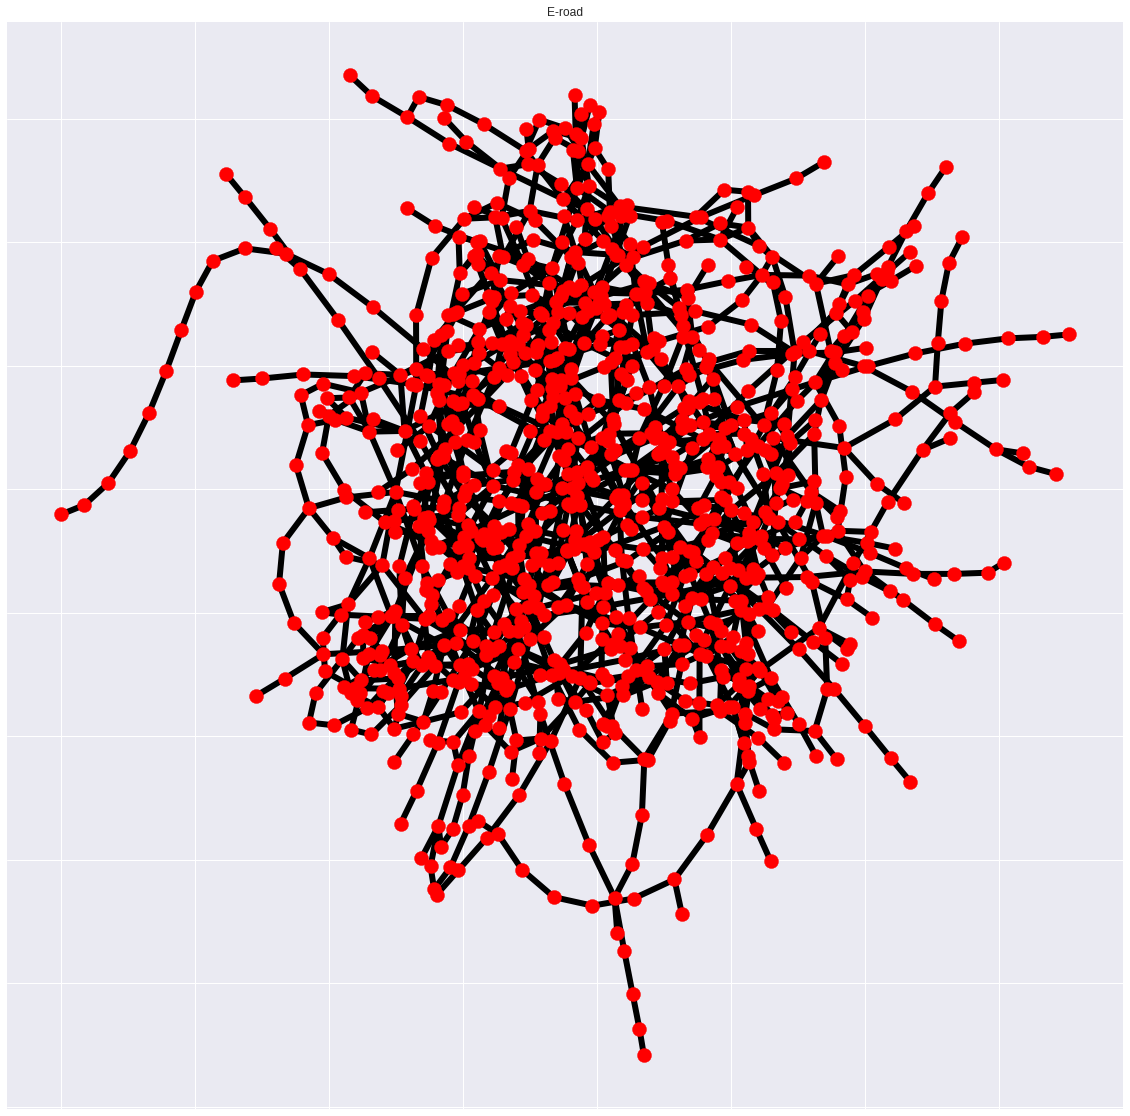

In [513]:
hams = nx.read_edgelist('datasets/euroroad', comments='%')
hams = max(nx.connected_component_subgraphs(hams), key=len)

plt.figure(figsize=(20,20))

pos = nx.spring_layout(hams)
plt.title('E-road')
nx.draw_networkx(hams, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)